In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [21]:
features = pd.read_csv("/Users/chandlershortlidge/Desktop/Ironhack/DA_FT_Extra_Week10/data/audio_features_clean.csv")

features.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicit_False,explicit_True
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,676.00,461.0000,1,-6.746,0,143.0000,0.0322,0.000001,358.0000,715.00,87.917,4,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0.42,166.0000,1,-17.235,1,0.0763,924.0000,0.000006,101.0000,267.00,77.489,4,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,438.00,359.0000,0,-9.734,1,0.0557,0.2100,0.000000,117.0000,0.12,76.332,4,1,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,266.00,0.0596,0,-18.515,1,0.0363,905.0000,0.000071,132.0000,143.00,181.740,3,1,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,618.00,443.0000,2,-9.681,1,0.0526,469.0000,0.000000,0.0829,167.00,119.949,4,1,0


In [22]:
X = features.drop(columns=["track_id", "artists", "album_name", "track_name"])

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
print("Shape", X_scaled.shape)

Shape (34477, 16)


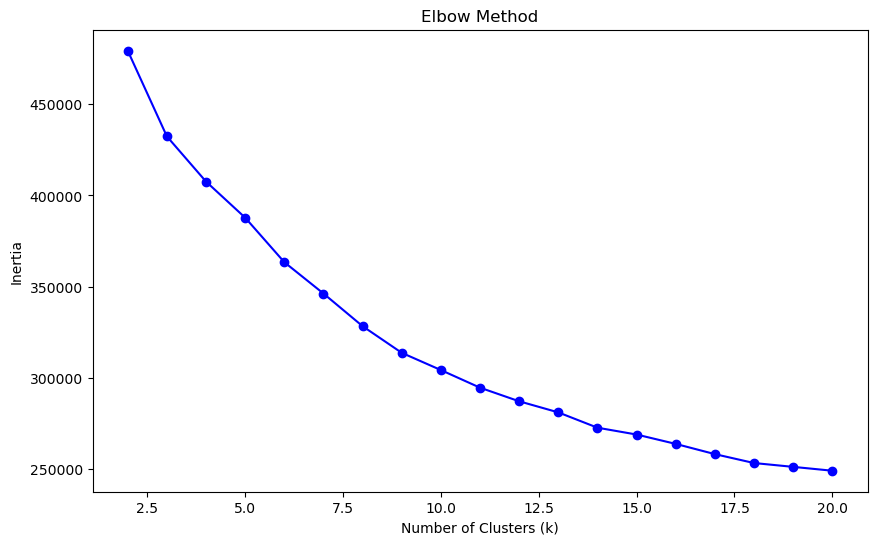

In [25]:
# Find optimal number of clusters using elbow method
inertias = []
K_range = range(2, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### try with fewer features

In [26]:
features_core = ['danceability', 'energy', 'valence', 'tempo', 
                 'acousticness', 'instrumentalness', 'speechiness', 'loudness']

X = features[features_core]

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
print("Shape", X_scaled.shape)

Shape (34477, 8)


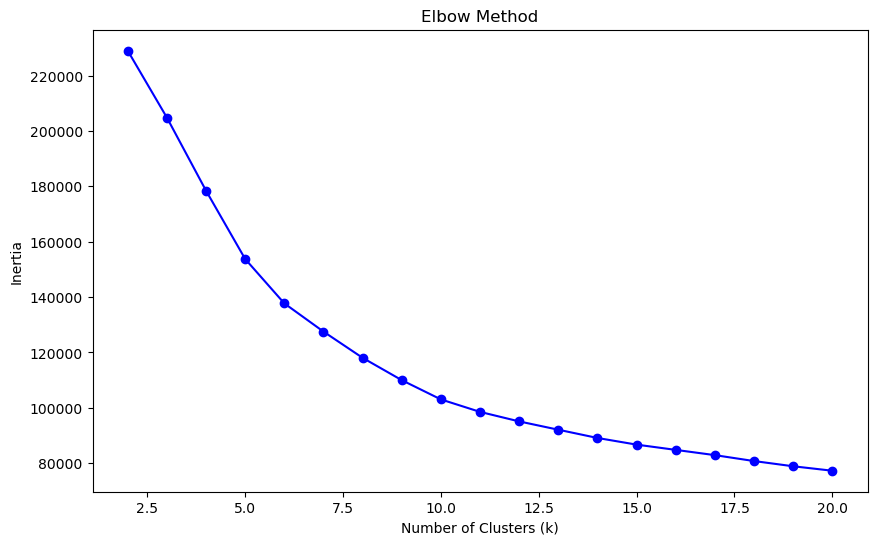

In [29]:
# Find optimal number of clusters using elbow method
inertias = []
K_range = range(2, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

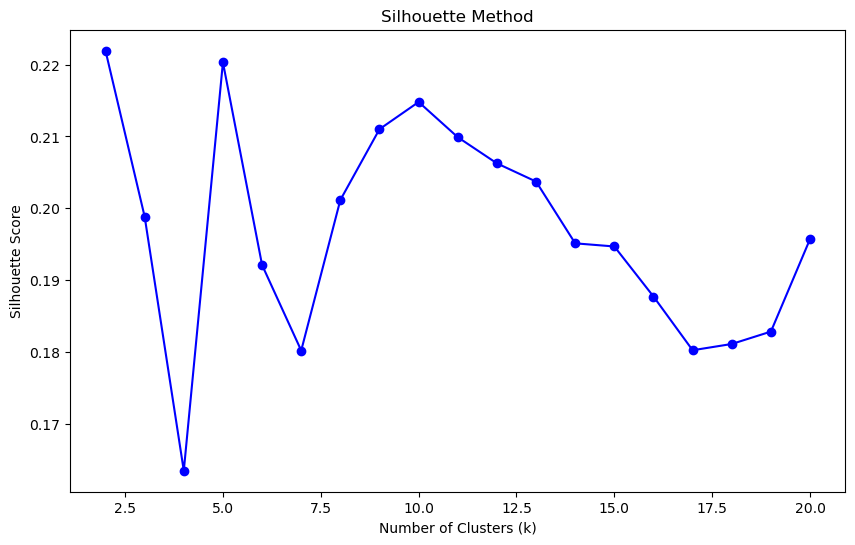

Best k by silhouette: 2 (score: 0.222)


In [30]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# Print best k
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k by silhouette: {best_k} (score: {max(silhouette_scores):.3f})")

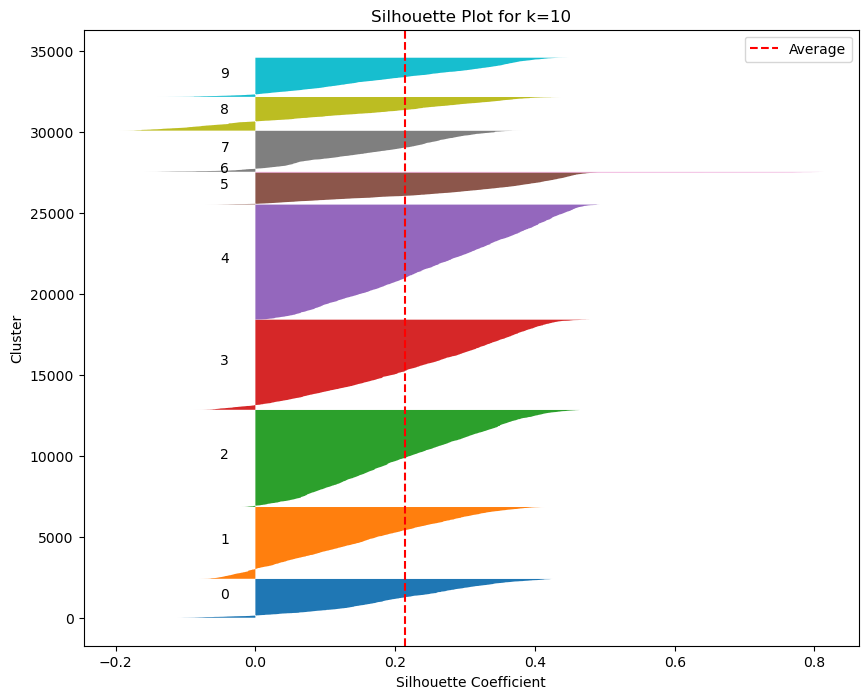

In [31]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Get silhouette score for each sample
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
silhouette_vals = silhouette_samples(X_scaled, labels)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
y_lower = 10

for i in range(10):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    
    y_upper = y_lower + len(cluster_silhouette_vals)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower = y_upper + 10

ax.axvline(x=silhouette_score(X_scaled, labels), color='red', linestyle='--', label='Average')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')
ax.set_title('Silhouette Plot for k=10')
plt.legend()
plt.show()

In [32]:
# Final clustering with k=10
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
features['cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster sizes
print(features['cluster'].value_counts().sort_index())

cluster
0    2394
1    4430
2    5981
3    5563
4    7093
5    1963
6      34
7    2528
8    2076
9    2415
Name: count, dtype: int64


In [33]:
# Look at the average features for each cluster
cluster_profiles = features.groupby('cluster')[features_core].mean()
print(cluster_profiles.round(2))

         danceability  energy  valence   tempo  acousticness  \
cluster                                                        
0              576.97   33.45   465.92  124.41        107.06   
1              471.95  752.30   452.39  161.78        116.81   
2              564.63  696.09   208.80  110.53         84.82   
3              459.42  295.41   282.32  111.44        764.87   
4              684.53  740.97   724.83  114.03        152.94   
5              357.54  152.61   210.48  103.82        849.51   
6              514.28  848.70   485.37  130.09         54.75   
7                8.88  635.44   463.01  122.57        163.27   
8              640.38  639.94   527.94  127.20        243.74   
9              584.80  624.59   293.58  125.16         89.70   

         instrumentalness  speechiness  loudness  
cluster                                           
0                   21.94        19.85     -7.46  
1                   13.00        25.46     -5.49  
2                   14.07  

In [34]:
# Sample 5 songs from each cluster
for i in range(10):
    print(f"\n=== CLUSTER {i} ===")
    sample = features[features['cluster'] == i][['track_name', 'artists']].sample(5, random_state=42)
    for _, row in sample.iterrows():
        print(f"  {row['track_name']} - {row['artists']}")


=== CLUSTER 0 ===
  Espírito Vem - Isaias Saad
  Somebody Told Me - The Killers
  Guerrilla - ATEEZ
  Run - OneRepublic
  Spicy (feat. Post Malone) - Ty Dolla $ign;Post Malone

=== CLUSTER 1 ===
  旅人 - Mr.Children
  7500 OBO - Tim McGraw
  Covergirl - Melody Club
  Spotlight - Upchurch
  Spellbound - Siouxsie and the Banshees

=== CLUSTER 2 ===
  粉紅色的腰帶 - 蔡秋鳳
  那些年 - Hu Xia
  Carne - Carajo
  Walking to Adachi - Nathan Kawanishi
  Chama Arteira - Samuca e a Selva

=== CLUSTER 3 ===
  Jupiter - Flower Face
  The Christmas Waltz - Peggy Lee
  It's Not Christmas 'Til You Come Home - Recorded At Spotify Studios NYC - Norah Jones
  Motion Sickness - Phoebe Bridgers
  小步舞曲 - Cheer Chen

=== CLUSTER 4 ===
  Shinzo wo Sasageyo! - TV Size - Linked Horizon
  Mama - Jonas Blue;William Singe
  Levitating - Dua Lipa;DaBaby
  While I'm Alone - Remastered - Maze;Frankie Beverly
  Present Without A Bow - Kacey Musgraves;Leon Bridges

=== CLUSTER 5 ===
  Carnaval, Op. 9: No. 2, Pierrot (Live in Japan,

In [ ]:
cluster_labels = {
    0: "Mainstream Pop/Rock",
    1: "Alternative / Country Rock",
    2: "International / World",
    3: "Soft Indie / Acoustic",
    4: "Upbeat Pop / Dance",
    5: "Classical / Instrumental",
    6: "Latin Party / Reggaeton",
    7: "Hard Rock / Anthemic",
    8: "Hip Hop / Reggaeton",
    9: "EDM / Techno / Disco"
}

features['cluster_label'] = features['cluster'].map(cluster_labels)

# Save it
features.to_csv('/Users/chandlershortlidge/Desktop/Ironhack/DA_FT_Extra_Week10/data/clustered_songs.csv', index=False)

In [36]:
print(len(features)) 

34477
